<a href="https://colab.research.google.com/github/Ziadabdelsalam/Scene-Detector-/blob/main/Scene_Detector_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras 
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Ci Data/Scenes training set'

In [ ]:
def loadImages(path):
    inner_path = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    images = []
    labels = []
    for i in range(len(inner_path)):
      image_inner = sorted([os.path.join(path, inner_path[i], file)
                            for file in os.listdir(path + "/" + inner_path[i])
                            if file.endswith('.jpg')])
      image_inner = [cv2.imread(img) for img in image_inner]
      labels_inner = [i] * len(image_inner) 
      images += image_inner
      labels += labels_inner 
    return images, labels

In [ ]:
training_images, training_labels = loadImages(path)

In [ ]:
training_data_backup = training_images
training_labels_backup = training_labels

In [ ]:
training_images = [cv2.resize(img, (150, 150)) for img in training_images]
training_images = np.reshape(training_images, (len(training_labels), 150, 150, 3))
training_labels = np.array(training_labels)

In [ ]:
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
model_1 = Sequential()
model_1.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(150, 150, 3)))
model_1.add(MaxPooling2D(pool_size=2))
model_1.add(Dropout(0.4))

model_1.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))
model_1.add(Dropout(0.3))

model_1.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))
model_1.add(Dropout(0.1))
model_1.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))
model_1.add(Dropout(0.1))

model_1.add(GlobalAveragePooling2D())

model_1.add(Dense(6, activation='softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        9280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)      

In [ ]:
#Save model weight
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
TRAINING_DIR = '/content/drive/MyDrive/Ci Data/Scenes training set'
train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(150, 150)
)

VALIDATION_DIR = '/content/drive/MyDrive/Ci Data'
validation_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(150, 150)
)

model_1.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator

Epoch 1/20
141/141 [==============================] - 851s 6s/step - loss: 1.5441 - accuracy: 0.3356

Epoch 00001: saving model to training_2/cp.ckpt
Epoch 2/20
141/141 [==============================] - 847s 6s/step - loss: 0.9720 - accuracy: 0.6087

Epoch 00002: saving model to training_2/cp.ckpt
Epoch 3/20
141/141 [==============================] - 857s 6s/step - loss: 0.7934 - accuracy: 0.7023

Epoch 00003: saving model to training_2/cp.ckpt
Epoch 4/20
141/141 [==============================] - 857s 6s/step - loss: 0.6913 - accuracy: 0.7473

Epoch 00004: saving model to training_2/cp.ckpt
Epoch 5/20
141/141 [==============================] - 838s 6s/step - loss: 0.6241 - accuracy: 0.7758

Epoch 00005: saving model to training_2/cp.ckpt
Epoch 6/20
141/141 [==============================] - 842s 6s/step - loss: 0.5735 - accuracy: 0.8003

Epoch 00006: saving model to training_2/cp.ckpt
Epoch 7/20
141/141 [==============================] - 842s 6s/step - loss: 0.5286 - accuracy: 0.8031

In [ ]:
print(np.argmax(model_1.predict(training_images), axis=1))

[4 4 0 ... 5 5 1]


In [ ]:
model_save_name = 'ci_model.pt'
path = F"/content/drive/My Drive/Ci Data/{model_save_name}" 
keras.models.save_model(model_1, path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Ci Data/ci_model.pt/assets


In [ ]:
path = '/content/drive/MyDrive/Ci Data'

In [ ]:
def loadImagesTest(path):
    image_files = sorted([os.path.join(path, 'Scenes testing test', file)
                          for file in os.listdir(path + "/Scenes testing test")
                          if file.endswith('.jpg')])
    return image_files

In [ ]:
testing_names = loadImagesTest(path)
testing_images = images = [cv2.imread(img) for img in testing_names]

In [ ]:
testing_images = [cv2.resize(img, (150, 150)) for img in testing_images]
testing_images = np.reshape(testing_images, (len(testing_images), 150, 150, 3))

In [ ]:
prediction = np.argmax(model_1.predict(testing_images), axis=1)

In [ ]:
import ntpath
testing_names = [ntpath.basename(name) for name in testing_names]

In [ ]:
import pandas as pd
list_of_submission = list(zip(testing_names, prediction))
submission = pd.DataFrame(list_of_submission, columns=['Image', 'Label'])
submission.to_csv("Submission.csv", index=False, header=True)

In [ ]:
def numbers_to_strings(argument): 
    switcher = { 
        0: "buildings", 
        1: "forest", 
        2: "glacier", 
        3: "mountain",
        4: "sea",
        5: "street"
    } 
    return switcher.get(argument, "nothing") 

buildings
buildings
buildings
buildings
buildings
buildings
buildings
buildings
forest
buildings
mountain
glacier
buildings
buildings
forest
buildings
street
street
mountain
street


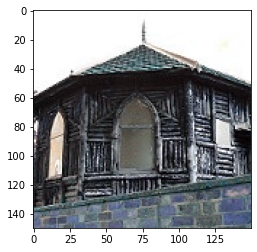

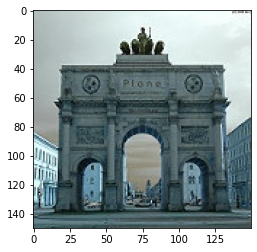

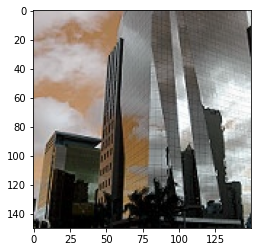

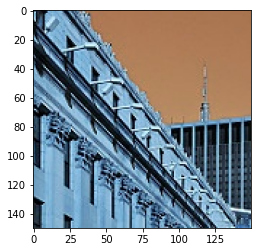

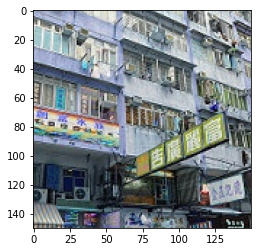

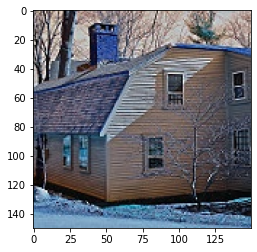

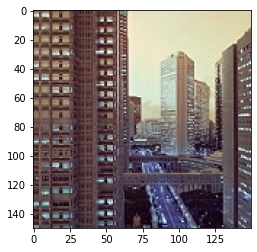

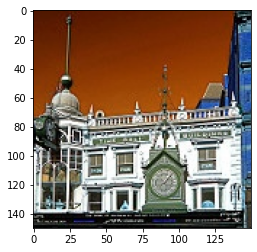

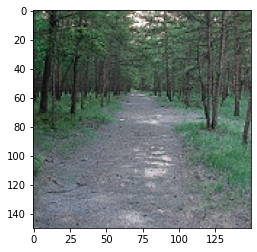

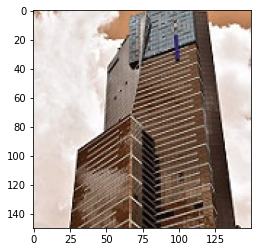

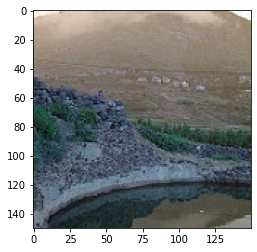

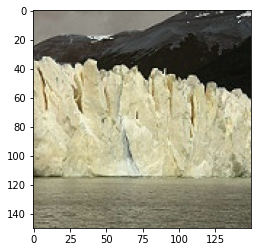

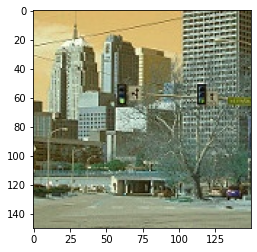

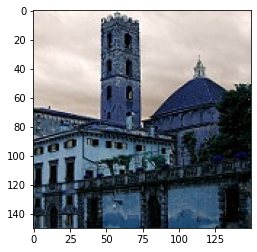

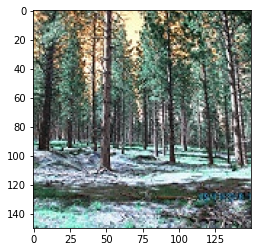

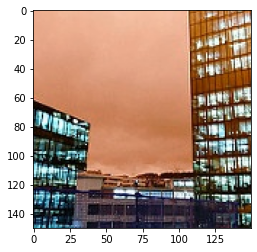

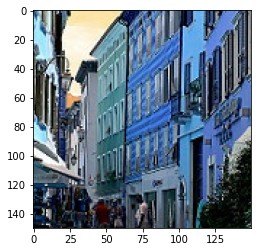

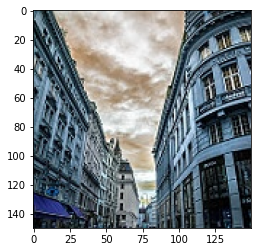

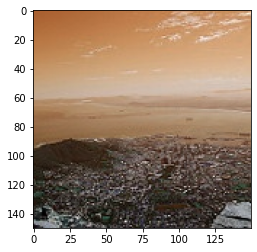

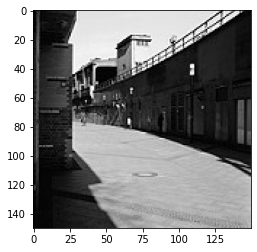

In [ ]:
for n in range(20):
  plt.figure()
  plt.imshow(testing_images[n]) 
  prediction_num = numbers_to_strings(prediction[n])
  print(prediction_num)